In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
df = pd.read_csv('/content/Salaries.csv')
df.head()


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


In [ ]:
df.columns

Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

**Task1 : Basic Data Exploration**

In [3]:
num_rows, num_columns = df.shape
print(f"Number of Rows: {num_rows}")
print(f"Number of Columns: {num_columns}")

Number of Rows: 148654
Number of Columns: 13


In [4]:
column_data_types = df.dtypes
print("Data Types of Each Column:")
print(column_data_types)


Data Types of Each Column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [5]:
missing_values = df.isnull().sum()
print("Missing Values in Each Column:")
print(missing_values)

Missing Values in Each Column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


**Task2:Descriptive Statistics**

Calculate mean

In [14]:
mean_salary = df['TotalPay'].mean()
print("Mean",mean_salary)

Mean 74768.32197169267


Calculate meadian

In [13]:
median_salary = df['TotalPay'].median()
print("Median",median_salary)

Median 71426.60999999999


Calculate mode

In [12]:
mode_salary = df['TotalPay'].mode()
print("Mode",mode_salary)

Mode 0    0.0
Name: TotalPay, dtype: float64


Calculate minimum, and maximum salary

In [11]:
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
print("Min",min_salary)
print("Max",max_salary)

Min -618.13
Max 567595.43


 Calculate the range of salaries

In [15]:
salary_range = max_salary - min_salary
print("Salary Range",salary_range)

Salary Range 568213.56


Calculate the standard deviation

In [16]:
std_dev_salary = df['TotalPay'].std()
print("standard deviation",std_dev_salary)

standard deviation 50517.00527394987


**Task3:Data Cleaning**

تم استخدام طريقة حساب المتوسط الحسابي لكل عمود عددي و وضعه بدلاً من القيم الفارغة بسبب طبيعة البيانات لدينا عدة أعمدة عددية

In [17]:
df_cleaned = df.fillna(df.mean())

<ipython-input-17-b0d9d108f52f>:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_cleaned = df.fillna(df.mean())


**Task4:Basic Data Visualization**

In [19]:
sns.set(style="whitegrid")

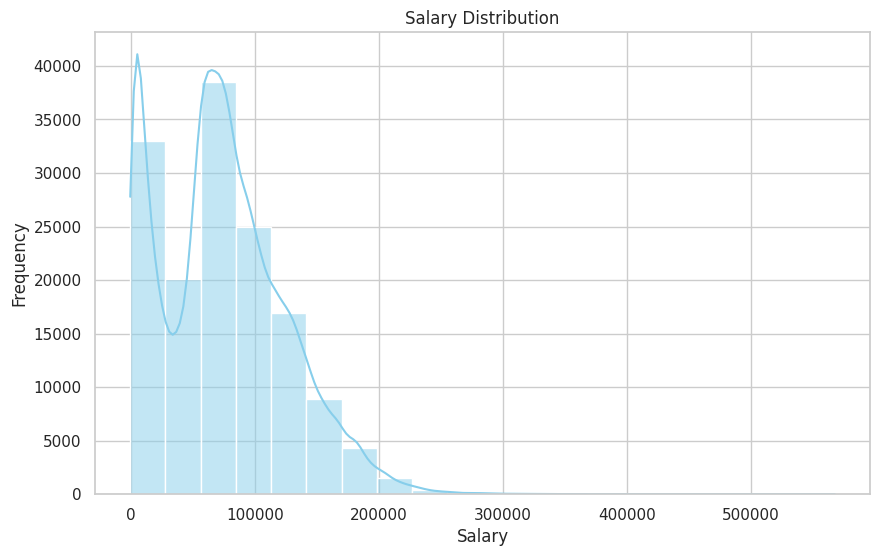

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['TotalPay'], bins=20, kde=True, color='skyblue')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

**Task5:Grouped Analysis**

In [23]:
grouped_data = df.groupby('EmployeeName')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max', 'std']).reset_index()

In [30]:
print("Summary Statistics by EmployeeName:")
print(grouped_data)

Summary Statistics by EmployeeName:
                 EmployeeName  count       mean     median       min  \
0            A BERNARD FATOOH      1  20039.910  20039.910  20039.91   
1           A Bernard  Fatooh      1  23923.620  23923.620  23923.62   
2            A Bernard Fatooh      2  21280.770  21280.770  18500.19   
3       A ELIZABETH MARCHASIN      1  26282.860  26282.860  26282.86   
4               A JAMIL NIAZI      1  87496.210  87496.210  87496.21   
...                       ...    ...        ...        ...       ...   
110806       Zun Jin Zhang He      2  57820.370  57820.370  56763.44   
110807               Zuna Luu      1  52518.080  52518.080  52518.08   
110808             Zuna T Luu      2  56121.675  56121.675  56087.91   
110809            Zuri  Jones      1  71986.900  71986.900  71986.90   
110810             Zuri Jones      2  76628.030  76628.030  66667.54   

             max           std  
0       20039.91           NaN  
1       23923.62           NaN  


**Task6:Simple Correlation Analysis**

In [27]:
correlation_matrix = df[['TotalPay', 'Year']].corr()
print("Correlation Matrix:")
print(correlation_matrix)


Correlation Matrix:
          TotalPay     Year
TotalPay   1.00000  0.03209
Year       0.03209  1.00000


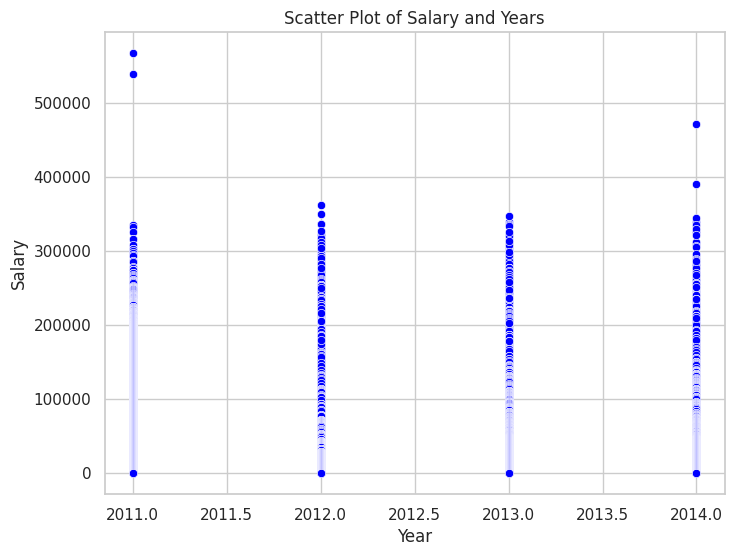

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Year', y='TotalPay', data=df, color='blue')
plt.title('Scatter Plot of Salary and Years')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()